In [116]:
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt  # Biblioteca para gerar gráficos
from sklearn import metrics, model_selection
from scipy import stats

## Questão 1

In [117]:
q1data = np.genfromtxt('./artificial1d.csv', delimiter=',')

MSE através do OLS:  0.21340090132936987


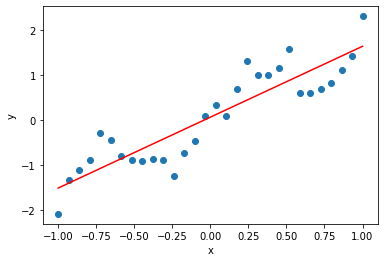

In [118]:
def MSE(y, y_pred):
    """
    Mean Squared Error (Erro Médio Quadrático) 
    """
    return np.mean((y - y_pred)**2)

def RMSE(y, y_pred):
    """
    Root Mean Squared Error
    """
    return np.sqrt(MSE(y, y_pred))

def OLS(X, y, _lambda = 0):
    """
    Ordinary Least Squares (Mínimos Quadrados Ordinários)

    Retorna o estimador do OLS
    """
    term = X.T @ X

    if _lambda > 0:
        I = np.eye(term.shape[0])
        I[0][0] = 0
        return np.linalg.inv(term + I * _lambda) @ X.T @ y
    else: 
        return np.linalg.inv(term) @ X.T @ y


x = q1data[:, 0]
y = q1data[:, 1]

X = np.c_[np.ones(q1data.shape[0]), x]
w_hat = OLS(X, y)
y_pred = X @ w_hat

plt.figure()
ax = plt.axes()
ax.scatter(x, y)
ax.plot(x, y_pred, color='red')
ax.set_xlabel('x')
ax.set_ylabel('y')

mse = MSE(y, y_pred)
print('MSE através do OLS: ', mse)


MSE através do GD:  0.21402591903608456


Text(0, 0.5, 'função custo')

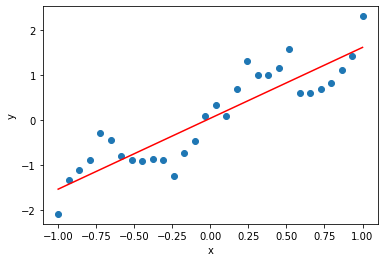

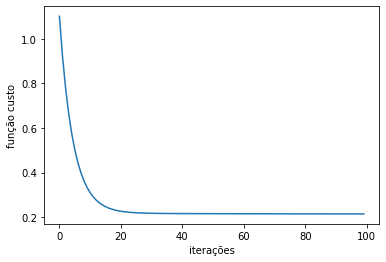

In [119]:
def GD(x, y, learning_rate, epochs):
    """
    Gradient Descent (Gradiente Descendente)
    """

    n = x.shape[0]
    w0 = 0
    w1 = 0

    y_pred = np.zeros(n)
    ei = np.zeros(n)

    mse = []

    for t in range(epochs):
        y_pred = w0 + (w1 * x)
        ei = y - y_pred
        w0 = w0 + (learning_rate * np.mean(ei))
        w1 = w1 + (learning_rate * np.mean(ei @ x))

        mse.append(MSE(y, y_pred))
    return (w0, w1), mse

epochs = 100
w, mse = GD(x, y, learning_rate=0.01, epochs=epochs)
y_pred = w[0] + (w[1] * x)

plt.figure()
ax = plt.axes()
ax.scatter(x, y)
ax.plot(x, y_pred, color='red')
ax.set_xlabel('x')
ax.set_ylabel('y')

print('MSE através do GD: ', mse[-1])
plt.figure()
ax = plt.axes()
ax.plot(np.arange(epochs), mse)
ax.set_xlabel('iterações')
ax.set_ylabel('função custo')

MSE através do SGD:  1.6381087737265512


Text(0, 0.5, 'função custo')

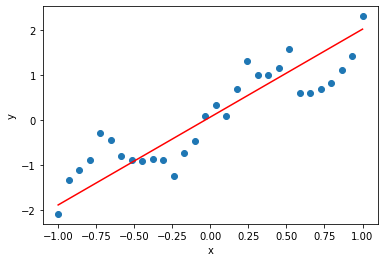

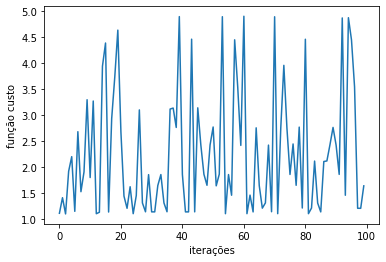

In [120]:
def SGD(x, y, learning_rate, epochs):
    """
    Stochastic Gradient Descent (Gradiente Descendente Estocástico)
    """
    n = x.shape[0]
    w0 = 0
    w1 = 0

    y_pred = 0
    ei = 0

    mse = []

    for t in range(epochs):
        data = np.c_[x, y]
        permutations = np.random.permutation(data)

        for j in permutations:
            y_pred = w0 + (w1 * j[0])
            ei = j[1] - y_pred
            w0 = w0 + (learning_rate * ei)
            w1 = w1 + (learning_rate * (ei * j[1]))

        mse.append(MSE(y, y_pred))
    
    return (w0, w1), mse


epochs = 100
w, mse = SGD(x, y, learning_rate=0.01, epochs=epochs)
y_pred = w[0] + (w[1] * x)

plt.figure()
ax = plt.axes()
ax.scatter(x, y)
ax.plot(x, y_pred, color='red')
ax.set_xlabel('x')
ax.set_ylabel('y')

print('MSE através do SGD: ', mse[-1])
plt.figure()
ax = plt.axes()
ax.plot(np.arange(epochs), mse)
ax.set_xlabel('iterações')
ax.set_ylabel('função custo')


## Questão 2

In [121]:
q2data = np.genfromtxt('./california.csv', delimiter=',')

Text(0, 0.5, 'rmse')

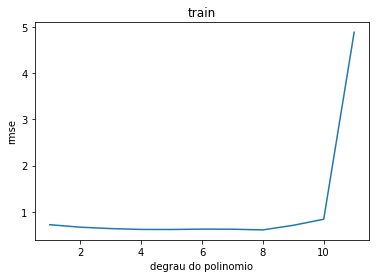

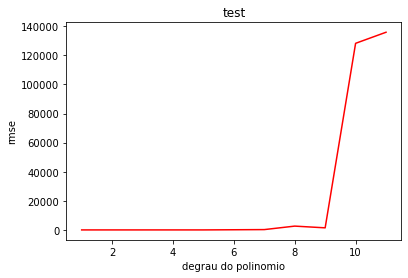

In [122]:
def z_score(x):
    for col in x:
        print(col)
        mean = col.mean()
        std = col.std()
        col = (col - mean) / std
    return x

def reverse_z_score(x, mean, std):
    return std * x + mean

def get_poly_columns(X, polynomial_degree):
    new_X = X.copy()
    if (polynomial_degree > 1):
        for polynomial in np.arange(2, polynomial_degree+1):
            new_X = np.c_[new_X, np.power(X, polynomial)]

    return new_X

def train_poly(X, y, polynomial_degree, _lambda=0):
    # adiciona as colunas do polinomio
    X = get_poly_columns(X, polynomial_degree)

    # normaliza entradas + polinomios
    X = stats.zscore(X)
    # X = z_score(X)

    # adiciona coluna de 1s
    X = np.c_[np.ones(X.shape[0]), X]

    # guarda média e desvio padrão da saida original para depois fazer processo reverso do zscore
    y_mean = y.mean()
    y_std = y.std()

    # normaliza saida
    y = stats.zscore(y)
    # y = z_score(y)

    X_train, X_test, y_train, y_test = model_selection.train_test_split(
        X, y, test_size=0.20, random_state=666
    )

    w_hat = OLS(X_train, y_train, _lambda=_lambda)

    y_pred_train = X_train @ w_hat
    y_train = reverse_z_score(y_train, y_mean, y_std)
    y_pred_train = reverse_z_score(y_pred_train, y_mean, y_std)

    y_pred_test = X_test @ w_hat
    y_test = reverse_z_score(y_test, y_mean, y_std)
    y_pred_test = reverse_z_score(y_pred_test, y_mean, y_std)

    return RMSE(y_train, y_pred_train), RMSE(y_test, y_pred_test)

X = q2data[:, np.arange(8)]
y = q2data[:, 8]

polynomial_degrees = np.arange(1, 12)
rmse_train = []
rmse_test = []
for degree in polynomial_degrees:
    model = train_poly(X, y, polynomial_degree=degree)
    rmse_train.append(model[0])
    rmse_test.append(model[1])

plt.figure()
ax = plt.axes()
ax.plot(polynomial_degrees, rmse_train)
ax.set_title('train')
ax.set_xlabel('degrau do polinomio')
ax.set_ylabel('rmse')

plt.figure()
ax = plt.axes()
ax.plot(polynomial_degrees, rmse_test, color='red')
ax.set_title('test')
ax.set_xlabel('degrau do polinomio')
ax.set_ylabel('rmse')


Text(0, 0.5, 'rmse')

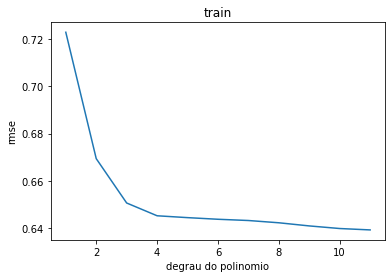

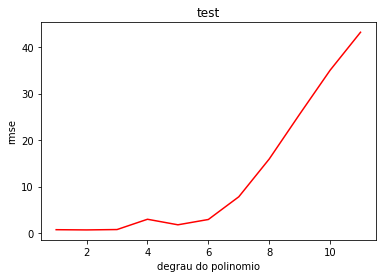

In [123]:
polynomial_degrees = np.arange(1, 12)
rmse_train = []
rmse_test = []
for degree in polynomial_degrees:
    model = train_poly(X, y, polynomial_degree=degree, _lambda=0.001)
    rmse_train.append(model[0])
    rmse_test.append(model[1])

plt.figure()
ax = plt.axes()
ax.plot(polynomial_degrees, rmse_train)
ax.set_title('train')
ax.set_xlabel('degrau do polinomio')
ax.set_ylabel('rmse')

plt.figure()
ax = plt.axes()
ax.plot(polynomial_degrees, rmse_test, color='red')
ax.set_title('test')
ax.set_xlabel('degrau do polinomio')
ax.set_ylabel('rmse')
